# FINAL PROJECT PHASE V

## Table of Contents:

1. [Part 1: Introduction](#introduction)
    - [Background Context](#Background)
    - [Research Questions](#research)
    
2. [Part 2: Data Overview](#overview)
    - [Data Source](#source)
    - [About the Data](#aboutthedata)
    - [Data Content](#content)
    - [Revelant Content](#relevantcontent)
    
3. [Part 3: Data Cleaning](#cleaning)

4. [Part 4: Visualization and Exploratory Data Analysis](#eda)
    - [y1: New_Add_to_Cart_Browsing](#y1plot)
    - [y2: Cart_Completion_Frequency ](#y2plot)  
    
5. [Part 5: Data Description](#datadescription)
    - [Motivation](#motivation)
    - [Credits and values of Data source](#credit)
    - [Data collection and Data processing](#datacollection)
    - [Observations and Attributes (rows and columns)](#observations)
    
6. [Part 6: Preregistration statements](#preregistration)

7. [Part 7: Data analysis & Evaluation of significance](#dataanalysiseval)
    - [Test Hypothesis 1](#test1)
    - [Test Hypothesis 2](#test2)
    - [Test Hypothesis 3](#test3)
    
8. [Part 8: Conclusion and Interpretation](#part8)
    - [Interpretation](#interpretation)
    - [Conclusion](#conclusion)
    
9. [Part 9: Data Limitation](#datalimitation)  
 
10. [Appendix](#appendix) 

## Part 1: Introduction <a name="introduction"></a>

### Background Context <a name="Background"></a>

Due to the rise of ecommerce, each company has their own strategies on improving user experience to boost sales. For example, providing reviews and recommendations and sending personalized recommendations.  Since Amazon is one of the most popular ecommerce platforms with over 300 million worldwide customers, we are interested in finding the correlation between users’ experience on Amazon and their purchasing decisions. 

### Research Question: <a name="research"></a>

**Correlation between user experience and consumer willingness of purchasing products in different age groups;** 
1) Do higher levels of helpfulness of Amazon reviews, helpfulness of Amazon recommendations, or personalized recommendations correlate with the higher frequency of users adding items to their shopping carts?
2) Do higher levels of helpfulness of Amazon reviews, helpfulness of Amazon recommendations, or personalized recommendations correlate with the higher frequency of users completing shopping cart purchases?
3) Do people who find the reviews helpful have a higher frequency of adding items to their cart among different age groups?

In this project, we would like to investigate if there is a correlation between x-variables (review helpfulness, recommendation helpfulness, frequency of receiving personalized product recommendations) and each y-variable (the frequency of adding items to cart and the frequency of cart completion). In addition, we would like to analyze the correlation of x-variables and y-variables in different age groups. The age groups include ***13-18, 19-25, 26-40, 41-64, and 65+***.

## Part 2: Data Overview <a name="overview"></a>

**Data Source** <a name="source"></a>

We found the dataset about behavioral analyses of Amazon customers on Kaggle, which aims to provide insights into customer preferences, shopping habits, and decision-making processes on the Amazon platform. The creator collected the data through a Google Form questionnaire and there were around six hundred customers who filled the survey out.

The creator included neutral, unbiased questions about browsing customer-related interaction variables like customer reviews and user interaction patterns and various variables related to their demographics.

**About the Data** <a name="aboutthedata"></a>

For example, the creator would ask questions such as “How often do you receive personalized product recommendations from Amazon?” The choices that the customers can select range from “Very Often” to “Rarely”.

The data includes questions that can provide valuable insights about consumer behavior through learning about customer preferences, shopping habits, and other decision-making factors as well as demographics. 

For example, it includes demographic variables such as age and gender, customer preferences such as product categories, and decision-making factors such as browsing frequency, customer reviews, and more.

**Data Content** <a name="content"></a>

The dataset originally had factors such as age, gender, Purchase Frequency, Purchase Categories, Personalized Recommendation Frequency, Browsing_Frequency, Product_Search_Method, Search_Result_Exploration, Customer_Reviews_Importance, Add_to_Cart_Browsing, Cart_Completion_Frequency, Cart_Abandonment_Factors, Saveforlater_Frequency, Review_Left, Review_Reliability, Review_Helpfulness, Personalized_Recommendation_Frequency, Recommendation_Helpfulness, Rating_Accuracy, Shopping_Satisfaction, Service_Appreciation, and Improvement_Areas.

**Revelant Content** <a name="relevantcontent"></a>

We picked age, Review Helpfulness, Recommendation Helpfulness, Personalized Recommendation Frequency, Cart Completion Frequency, Add to Cart Browsing, and Customer Reviews Importance because we felt that factors such as Review Helpfulness, Recommendation Helpfulness, and Personalized Recommendation Frequency are more relevant to us in real life. These factors contribute to what most people value when making choices in wanting to purchase a product, which is demonstrated through Add to Cart Browsing, and Customer Reviews Importance. We mainly wanted to see if there was a pattern in how consumer behavioral factors can contribute to the decision-making process in buying the product generally and by age category. 


In [6]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression, \
LogisticRegression
import duckdb
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import statsmodels.api as sm
from scipy import stats 
from scipy.stats import permutation_test

In [7]:
#import packages and read csv file
raw_df=pd.read_csv("/Users/ashleychiang/2950PROJECT/\
Amazon Customer Behavior Survey.csv",thousands=",")

print(raw_df.shape)
raw_df.head()

(602, 23)


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


## Part 3: Data Cleaning: <a name="cleaning"></a>
Based on our research questions and our interests, we filtered out 6 variables/columns that are relevant toward our study, including age, review helpfulness, recommendation helpfulness, personalized recommendation frequency, cart completion frequency, add to cart browsing, and customer reviews importance. 

- We changed the categorical variables from strings to corresponding numerical values as new columns.
- We selected the new columns to a new dataframe.
- We filtered out oddities: filtered out data that are collected from people who are under 13.
- We created our final dataframe with a new column that classifies ages into 5 distinct age groups (13-18, 19-25, 26-40, 41-64, and 65+)

For more details, please check our Appendix located in our Github Repository.

In [8]:
# load our cleaned dataframe 
final_df = pd.read_csv("/Users/ashleychiang/2950PROJECT/appendix.csv", delimiter=',')
final_df = final_df.drop('Unnamed: 0', axis=1)
final_df.head()

,age,New_Review_Helpfulness,New_Recommendation_Helpfulness,New_Personalized_Recommendation_Frequency,New_Cart_Completion_Frequency,New_Add_to_Cart_Browsing,age_group
0,23,2,2,2,2,2,2
1,23,2,1,2,3,2,2
2,24,0,0,0,2,2,2
3,24,2,1,1,2,1,2
4,22,2,2,2,2,2,2


## Part 4: Visualization and Exploratory Data Analysis (EDA) <a name="eda"></a>

The following bar plots visualize the distribution of values in the y-variable and potential x-variable columns over different ratings and group by age.
- y1: Add to Cart Browsing
- y2: Cart Completion Frequency
- x1: New Review Helpfulness
- x2: Recommendation Helpfulness
- x3: Personalized Recommendation Frequency

We wanted to create a function called ***plotbar*** that returns a grouped bar chart. We made 6 bar charts in total for each x and y variables, and each bar represents the mean value of an age group.

We used the following attributes:
- x_var: our x variables have categorical values and during our data cleaning process, we changed them to numbers that corresponds to the values. For example, the range can be from 0-2 when our values are from No, Sometimes, and Yes
- age_means: the mean of each age group 
- xlabel: x variable
- ylabel: y variable
- title: title of the chart

In [9]:
def plotbar(x_var, age_means, xlabel, ylabel, title):
    x = np.arange(len(x_var))
    width = 0.17  
    
    # adjust the layout to prevent overlapping elements
    fig, ax = plt.subplots(layout='constrained')
    
    multiplier = 0
    
    for attri, measure in age_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measure, width, label=attri)
        ax.bar_label(rects, labels=measure, padding=3)
        multiplier += 1

    # title and custom x-axis tick labels
    ax.set_xticks(x + width, x_var)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 4)
    
    # add text for labels
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xlabel(xlabel)

    plt.show()
    return ax

### y1: New_Add_to_Cart_Browsing <a name="y1plot"></a>

We first calculated the mean of each age group between each x variable (x1: New Review Helpfulness, x2: Recommendation Helpfulness, x3: Personalized Recommendation Frequency) and the frequency of Add to Cart Browsing (y1). We then used the plotbar function to visualize the mean of y1 in different ratings based on the age groups.

age_group  New_Review_Helpfulness
1          0                         0.50
           1                         0.88
           2                         1.25
2          0                         0.70
           1                         1.03
           2                         1.65
3          0                         0.58
           1                         0.91
           2                         1.58
4          0                         0.83
           1                         0.87
           2                         1.32
5          1                         0.50
Name: New_Add_to_Cart_Browsing, dtype: float64


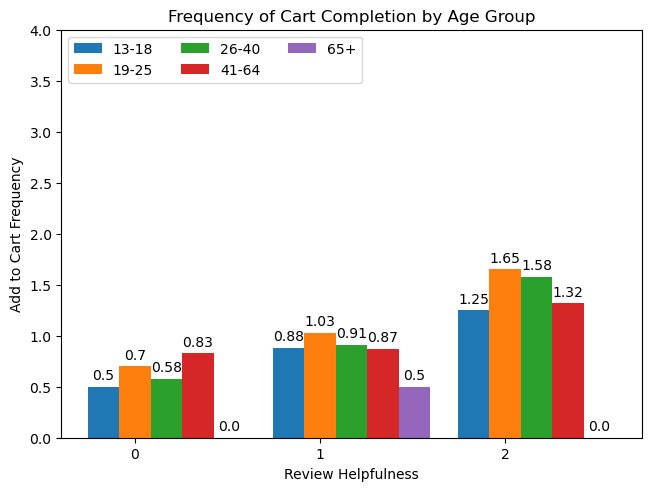

age_group  New_Recommendation_Helpfulness
1          0                                 0.71
           1                                 1.00
           2                                 0.67
2          0                                 0.81
           1                                 1.31
           2                                 1.63
3          0                                 0.72
           1                                 1.10
           2                                 1.46
4          0                                 0.67
           1                                 0.98
           2                                 1.33
5          1                                 0.00
           2                                 1.00
Name: New_Add_to_Cart_Browsing, dtype: float64


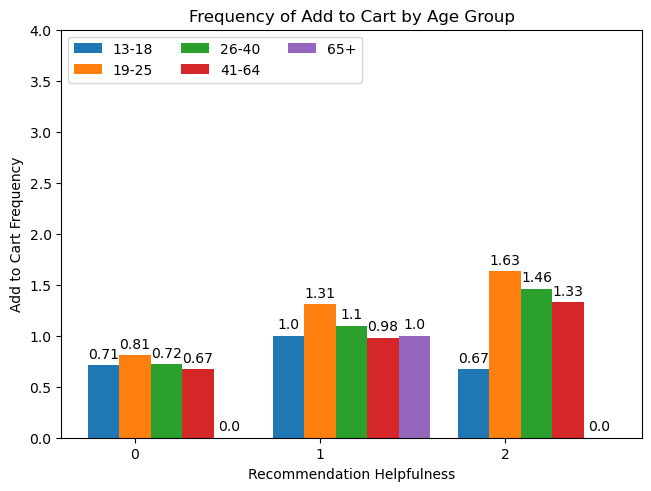

age_group  New_Personalized_Recommendation_Frequency
1          0                                            0.82
           1                                            0.83
           2                                            1.00
2          0                                            1.33
           1                                            1.15
           2                                            1.40
3          0                                            0.89
           1                                            1.04
           2                                            1.43
4          0                                            0.76
           1                                            1.02
           2                                            1.32
5          1                                            0.50
Name: New_Add_to_Cart_Browsing, dtype: float64


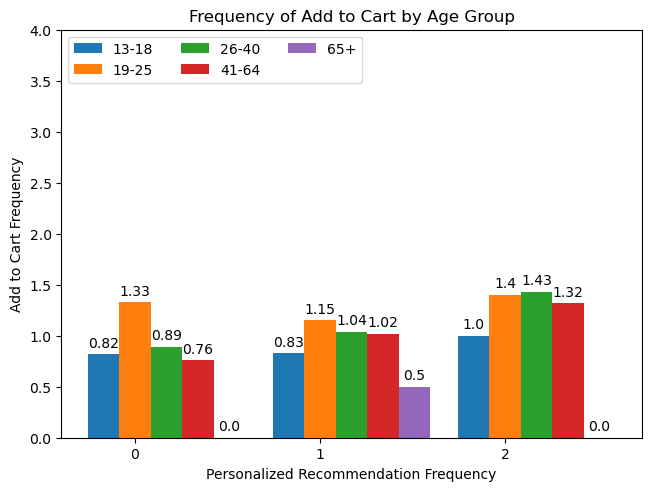

<Axes: title={'center': 'Frequency of Add to Cart by Age Group'}, xlabel='Personalized Recommendation Frequency', ylabel='Add to Cart Frequency'>

In [10]:
#x1_y1: find the mean of y1 in different ratings of x1 grouped by age group
mean_x1_y1 = final_df.groupby(['age_group', 'New_Review_Helpfulness'])['New_Add_to_Cart_Browsing']\
.mean().round(2)
print(mean_x1_y1)

x_var = ("0", "1", "2")
x1_y1_age_means = {
    '13-18': (0.50, 0.88, 1.25),
    '19-25': (0.70, 1.03, 1.65),
    '26-40': (0.58, 0.91, 1.58),
    '41-64': (0.83, 0.87, 1.32),
    '65+': (0.00, 0.50, 0.00)
}

#plot x1_y1 bar chart
plotbar(x_var, x1_y1_age_means,'Review Helpfulness', 'Add to Cart Frequency', \
        'Frequency of Cart Completion by Age Group')

#x2_y1: find the mean of y1 in different ratings of x2 grouped by age group
mean_x2_y1 = final_df.groupby(['age_group', 'New_Recommendation_Helpfulness'])['New_Add_to_Cart_Browsing']\
.mean().round(2)
print(mean_x2_y1)

x_var = ("0", "1", "2")
x2_y1_age_means = {
    '13-18': (0.71, 1.00, 0.67),
    '19-25': (0.81, 1.31, 1.63),
    '26-40': (0.72, 1.10, 1.46),
    '41-64': (0.67, 0.98, 1.33),
    '65+': (0.00, 1.00, 0.00)
}

#plot x2_y1 bar chart
plotbar(x_var, x2_y1_age_means, 'Recommendation Helpfulness', 'Add to Cart Frequency', \
        'Frequency of Add to Cart by Age Group')

#x3_y1: find the mean of y1 in different ratings of x3 grouped by age group
mean_x3_y1 = final_df.groupby(['age_group', 'New_Personalized_Recommendation_Frequency'])\
['New_Add_to_Cart_Browsing']\
.mean().round(2)
print(mean_x3_y1)

x_var = ("0", "1", "2")
x3_y1_age_means = {
    '13-18': (0.82, 0.83, 1.00),
    '19-25': (1.33, 1.15, 1.40),
    '26-40': (0.89, 1.04, 1.43),
    '41-64': (0.76, 1.02, 1.32),
    '65+': (0.00, 0.50, 0.00)
}

#plot x3_y1 bar chart
plotbar(x_var, x3_y1_age_means, 'Personalized Recommendation Frequency', 'Add to Cart Frequency', \
        'Frequency of Add to Cart by Age Group')

### y2: Cart_Completion_Frequency <a name="y2plot"></a>

We first calculated the mean of each age group between each x variable (x1: New Review Helpfulness, x2: Recommendation Helpfulness, x3: Personalized Recommendation Frequency) and the frequency of Cart Completion (y2). We then used the plotbar function to visualize the mean of y2 in different ratings based on the age groups.

age_group  New_Review_Helpfulness
1          0                         1.83
           1                         2.75
           2                         2.00
2          0                         2.16
           1                         2.05
           2                         2.27
3          0                         2.08
           1                         2.15
           2                         2.61
4          0                         2.21
           1                         1.91
           2                         2.68
5          1                         2.50
Name: New_Cart_Completion_Frequency, dtype: float64


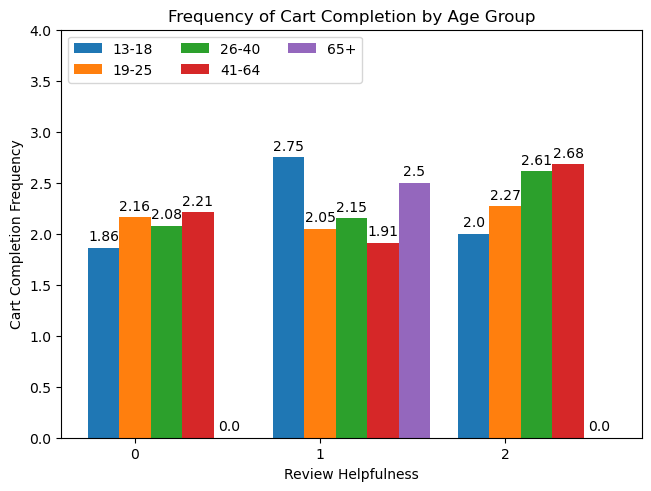

age_group  New_Recommendation_Helpfulness
1          0                                 1.86
           1                                 2.62
           2                                 2.33
2          0                                 2.29
           1                                 1.98
           2                                 2.45
3          0                                 2.23
           1                                 2.24
           2                                 2.46
4          0                                 1.96
           1                                 2.09
           2                                 2.70
5          1                                 2.00
           2                                 3.00
Name: New_Cart_Completion_Frequency, dtype: float64


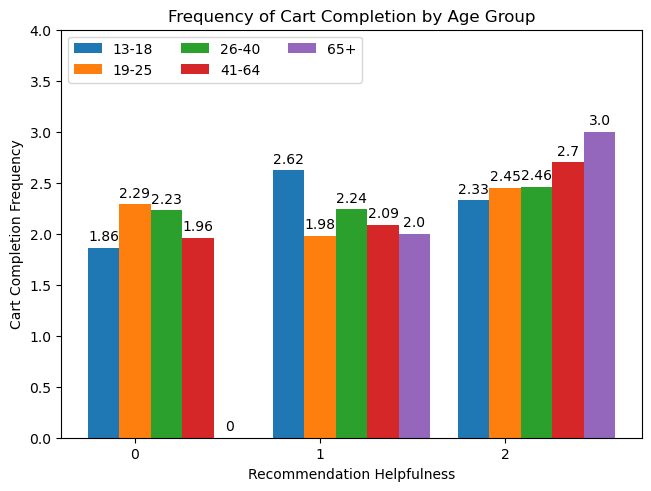

age_group  New_Personalized_Recommendation_Frequency
1          0                                            2.09
           1                                            2.50
           2                                            3.00
2          0                                            2.10
           1                                            2.11
           2                                            2.46
3          0                                            2.36
           1                                            2.18
           2                                            2.33
4          0                                            2.21
           1                                            2.09
           2                                            2.58
5          1                                            2.50
Name: New_Cart_Completion_Frequency, dtype: float64


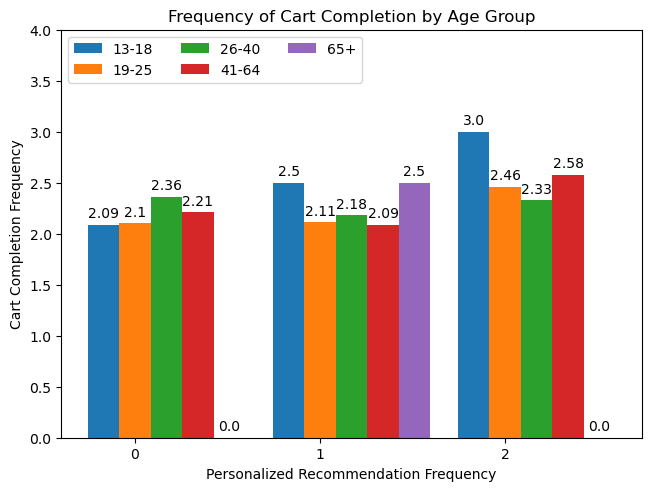

<Axes: title={'center': 'Frequency of Cart Completion by Age Group'}, xlabel='Personalized Recommendation Frequency', ylabel='Cart Completion Frequency'>

In [11]:
#x1_y2: find the mean of y2 in different ratings of x1 grouped by age group
mean_x1_y2 = final_df.groupby(['age_group', 'New_Review_Helpfulness'])['New_Cart_Completion_Frequency']\
.mean().round(2)
print(mean_x1_y2)

x_var = ("0", "1", "2")
x1_y2_age_means = {
    '13-18': (1.86, 2.75, 2.00),
    '19-25': (2.16, 2.05, 2.27),
    '26-40': (2.08, 2.15, 2.61),
    '41-64': (2.21, 1.91, 2.68),
    '65+': (0.00, 2.50, 0.00)
}

#plot x1_y2 bar chart
plotbar(x_var, x1_y2_age_means, 'Review Helpfulness', 'Cart Completion Frequency', \
        'Frequency of Cart Completion by Age Group')

#x2_y2: find the mean of y2 in different ratings of x2 grouped by age group
mean_x2_y2 = final_df.groupby(['age_group', 'New_Recommendation_Helpfulness'])['New_Cart_Completion_Frequency']\
.mean().round(2)
print(mean_x2_y2)

x_var = ("0", "1", "2")
x2_y2_age_means = {
    '13-18': (1.86, 2.62, 2.33),
    '19-25': (2.29, 1.98, 2.45),
    '26-40': (2.23, 2.24, 2.46),
    '41-64': (1.96, 2.09, 2.70),
    '65+': (0, 2.00, 3.00)
}

#plot x2_y2 bar chart
plotbar(x_var, x2_y2_age_means, 'Recommendation Helpfulness', 'Cart Completion Frequency', \
        'Frequency of Cart Completion by Age Group')

#x3_y2: find the mean of y2 in different ratings of x3 grouped by age group
mean_x3_y2 = final_df.groupby(['age_group', 'New_Personalized_Recommendation_Frequency'])\
['New_Cart_Completion_Frequency']\
.mean().round(2)
print(mean_x3_y2)

x_var = ("0", "1", "2")
x3_y2_age_means = {
    '13-18': (2.09, 2.50, 3.00),
    '19-25': (2.10, 2.11, 2.46),
    '26-40': (2.36, 2.18, 2.33),
    '41-64': (2.21, 2.09, 2.58),
    '65+': (0.00, 2.50, 0.00)
}

#plot x3_y2 bar chart
plotbar(x_var, x3_y2_age_means, 'Personalized Recommendation Frequency', 'Cart Completion Frequency', \
        'Frequency of Cart Completion by Age Group')

## Part 5: Data Description <a name="datadescription"></a>

### Motivation <a name="motivation"></a>

This dataset was created because the creator was interested in what factors can contribute to overall customer preference, behavior, and satisfaction with Amazon’s services. This dataset can help with finding patterns in helping the business with improving user experience and purchasing behaviors. Through this, they can be able to see a correlation of what impacts the consumer behavior and look for patterns to help improve user experience.
Swathi Menon from Kaggle created a google form questionnaire and asked Amazon users to fill out this form. It is unclear what platform they shared their form to unfortunately, which is one of the limitations of the dataset. 

### Credits and values of Data source <a name="credit"></a>
Swathi has some expertise in analyzing datasets and creating regressions models, as they have done in their internship at Luminar Technolab. They have created multiple notebooks on Kaggle as a Notebook expert at Kaggle.

### Data collection and Data processing <a name="datacollection"></a>

It does not explicitly say that the people who completed the survey were aware that their data was collected and publicized. Surveys are usually for data collection, but it doesn’t say if they were aware that this is publicized. Despite this, they can expect the data to be collected to form some analysis of some point. 

Processes that might have influenced the data was where the creator shared their questionnaire. Some people might not use certain platforms and that might have caused a biased result. Furthermore, this questionnaire was online so we felt like some people who might not use technology won’t use it. Since it is a questionnaire, it is optional and voluntary. People with stronger opinions are more oriented to fill this survey out, so the data might be biased. 

### Observations and Attributes (rows and columns) <a name="observations"></a>

* 1.age= age 
* 2.gender= gender 
* 3.Purchase_Frequency= How frequently do you make purchases on Amazon? 
* 4.Purchase_Categories= What product categories do you typically purchase on Amazon? 
* 5.Personalized_Recommendation_Frequency = Have you ever made a purchase based on personalized product recommendations from Amazon? 
* 6.Browsing_Frequency =How often do you browse Amazon's website or app? 
* 7.Product_Search_Method =How do you search for products on Amazon? 
* 8.Search_Result_Exploration =Do you tend to explore multiple pages of search results or focus on the first page? 
* 9.Customer_Reviews_Importance =How important are customer reviews in your decision-making process? 
* 10.Add_to_Cart_Browsing =Do you add products to your cart while browsing on Amazon? 
* 11.Cart_Completion_Frequency =How often do you complete the purchase after adding products to your cart? 
* 12.Cart_Abandonment_Factors =What factors influence your decision to abandon a purchase in your cart? 
* 13.Saveforlater_Frequency =Do you use Amazon's "Save for Later" feature, and if so, how often? 
* 14.Review_Left =Have you ever left a product review on Amazon? 
* 15.Review_Reliability =How much do you rely on product reviews when making a purchase? 
* 16.Review_Helpfulness =Do you find helpful information from other customers' reviews? 
* 17.Personalized_Recommendation_Frequency =How often do you receive personalized product recommendations from Amazon? 
* 18.Recommendation_Helpfulness =Do you find the recommendations helpful? 
* 19.Rating_Accuracy =How would you rate the relevance and accuracy of the recommendations you receive 
* 20.Shopping_Satisfaction =How satisfied are you with your overall shopping experience on Amazon? 
* 21.Service_Appreciation =What aspects of Amazon's services do you appreciate the most? 
* 22.Improvement_Areas =Are there any areas where you think Amazon can improve?

There is no exact raw data, as the creator did not web scrape anything. The creator created this raw dataset from google form responses. The original dataset can be found in the follwoing link: https://www.kaggle.com/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset/data


## Part 6: Preregistration statements <a name="preregistration"></a>
**Hypothesis 1**

- Null: Higher levels of helpfulness of Amazon reviews, helpfulness of Amazon recommendations, or personalized recommendations do not correlate to the higher frequency of users adding items to their shopping carts. 
- Alternative: Higher levels of helpfulness of Amazon reviews, helpfulness of Amazon recommendations, or personalized recommendations correlate to the higher frequency of users adding items to their shopping carts. 


**Hypothesis 2**

- Null: Higher levels of helpfulness of Amazon reviews, helpfulness of Amazon recommendations, or personalized recommendations do not correlate to the higher frequency of users completing shopping cart purchases. 
- Alternative: Higher levels of helpfulness of Amazon reviews, helpfulness of Amazon recommendations, or personalized recommendations correlate to the higher frequency of users completing shopping cart purchases.

**Hypothesis 3**

- Null:  Young adults (19-25) who find the reviews helpful do not have a higher frequency of adding items to their shopping cart.

- Alternative: Young adults (19-25) who find the reviews helpful have a higher frequency of adding items to their shopping cart.


## Part 7: Data analysis & Evaluation of significance <a name="dataanalysiseval"></a>

1. Created **train/test** set with 0.7/0.3 split 
2. Made **residual plots** to confirm if any variable need to be transformed if there is a pattern (not randomized)
3. Used **correlation coefficient matrix** to check for multicollinearity

In [26]:
# Split the dataset by 70% training and 30% testing
train, test= train_test_split(final_df, test_size=0.3, random_state=42)
print(train)

     age  New_Review_Helpfulness  New_Recommendation_Helpfulness  \
108   24                       2                               2   
272   23                       0                               2   
599   23                       1                               1   
479   23                       2                               1   
436   35                       1                               1   
..   ...                     ...                             ...   
71    36                       0                               1   
106   25                       2                               1   
270   34                       1                               0   
435   33                       1                               1   
102   23                       2                               2   

     New_Personalized_Recommendation_Frequency  New_Cart_Completion_Frequency  \
108                                          1                              3   
272                  

### A) Test Hypothesis 1:  <a name="test1"></a>

#### Null: Higher levels of helpfulness of Amazon reviews, helpfulness of Amazon recommendations, or personalized recommendations do not correlate to the higher frequency of users adding items to their shopping carts. 

**1. Ordinary Least Square Regression (OLS)**

We ran the ordinary least square regression (OLS) on the training set to look at correlation between x-variables and New_Add_to_Cart_Browsing (y-variable) and to check the p-value of each x-variables. 

**Analysis:** Based on the OLS summary, we found out that there are positive correlation between every x-variable and the y-variable. However, the p-value of the variable New_Personalized_Recommendation_Frequency is greater than 0.05 which is not statistically significant. Therefore, we can reject the statement higher levels of helpfulness of Amazon reviews and helpfulness of Amazon recommendations do not correlate to the higher frequency of users adding items to their shopping carts, but accept the null hypothesis for the third x-variable (New_Personalized_Recommendation_Frequency). 

In [27]:
# input list
input_vars = ["New_Review_Helpfulness", "New_Recommendation_Helpfulness", \
              "New_Personalized_Recommendation_Frequency"]

X = train[input_vars]
y = train['New_Add_to_Cart_Browsing'].values.reshape(-1, 1)

X = sm.add_constant(X)
reg = sm.OLS(y, X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     51.94
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.56e-28
Time:                        22:44:32   Log-Likelihood:                -416.64
No. Observations:                 420   AIC:                             841.3
Df Residuals:                     416   BIC:                             857.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

**2. Multi-linear Regression Model**

Based on our results from OLS regression, we decided to drop one of the x-variables (New_Personalized_Recommendation_Frequency) and create a new multi-linear regression model on the trained test with the rest of the x-variables (New_Review_Helpfulness and New_Recommendation_Helpfulness).

**Interpretation:**

Review Helpfulness: All else equal, for every one unit increase in review helpfulness, our model predicts the frequency of Add to Cart Browsing to increase by around 0.43 units.

Recommendation Helpfulness: All else equal, for every one unit increase in Recommendation helpfulness, our model predicts the frequency of Add to Cart Browsing to increase by around 0.16 units.

Intercept: When the Review Helpfulness and the Recommendation Helpfulness are both zero, our model predicts that the frequency of Add to Cart Browsing is around 0.49.

In [44]:
input_vars = ["New_Review_Helpfulness", "New_Recommendation_Helpfulness"]

X = train[input_vars]
y = train['New_Add_to_Cart_Browsing'].values.reshape(-1, 1)
model = LinearRegression().fit(X, y)

print(f"The model's Review Helpfulness coefficient is \
{model.coef_[0][0].round(2)}")
print(f"The model's Recommendation Helpfulness coefficient is \
{model.coef_[0][1].round(2)}")
print(f"The model's intercept is \
{model.intercept_[0].round(2)}")

The model's Review Helpfulness coefficient is 0.43
The model's Recommendation Helpfulness coefficient is 0.16
The model's intercept is 0.49


**3. Model Prediction and Root Mean Squared Error (RMSE)**

We created a f

We first created prediction models for both train and test sets, and then for each set, we calculated the RSME and normalized the value. We mainly wanted to see how accurate our model predictions are, and see if our model is over/underfitting.

We chose RMSE because we wanted to consider biased outliers in our model where for MAE, it treats all errors equally without squaring them. 

**Analysis:** Since both Train RMSE and Test RMSE are close to 0, we can conclude that our model is fairly accurate in making predictions for our model. Our model can underfit since the Train RMSE is greater than the Test RMSE. However, our normalized Train and Test RMSE values are fairly close, so this indicates that our model has a relatively good performance and can be generalized to apply to other data. 

In [79]:
# run the kfold and get the mean of rmse 
def kfold_rmse(input, reg, X_train, y_train, test):
    rmse = []
    kf = KFold(n_splits=3, shuffle=True)
    scores_train = cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
    scores_test = cross_val_score(reg, test[input], test['New_Add_to_Cart_Browsing'], \
                                  scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
    train = np.sqrt(np.absolute(scores_train).mean())
    rmse.append(train)
    test = np.sqrt(np.absolute(scores_test).mean())
    rmse.append(test)
    return rmse

In [80]:
# parameter 'input' accepts a list of predictor(s)
def cv(input):
    rmse_train = []
    rmse_test = []
    
    # execute 100 times of kfold
    for times in range (100):
        output = kfold_rmse(input, model, X, y, test)
        train_rmse = output[0]
        rmse_train.append(train_rmse)
        test_rmse = output[1]
        rmse_test.append(test_rmse)
    
    # caculate the average of rmse 
    avg_train_rmse = sum(rmse_train)/len(rmse_train)
    avg_test_rmse = sum(rmse_test)/len(rmse_test)
    
    # normalize the average rmse to 0-1 scale
    nor_train_rmse = avg_train_rmse/4
    nor_test_rmse = avg_test_rmse/4
    
    # print out the summary
    print(f'Input(s): {input}')
    print(f'RMSE_train: {nor_train_rmse}; RMSE_test: {nor_test_rmse}')
    print(f'difference = {nor_train_rmse - nor_test_rmse}')
    print(' ')

In [81]:
combination = [['New_Review_Helpfulness'], ['New_Recommendation_Helpfulness'], \
              ['New_Review_Helpfulness', 'New_Recommendation_Helpfulness']]

for i in combination: 
    cv(i)

Input(s): ['New_Review_Helpfulness']
RMSE_train: 0.16485895603700992; RMSE_test: 0.16622029495387203
difference = -0.0013613389168621037
 
Input(s): ['New_Recommendation_Helpfulness']
RMSE_train: 0.16489294235572108; RMSE_test: 0.16771830895905057
difference = -0.0028253666033294933
 
Input(s): ['New_Review_Helpfulness', 'New_Recommendation_Helpfulness']
RMSE_train: 0.16503691693951772; RMSE_test: 0.16074604557997368
difference = 0.004290871359544035
 


### B) Test Hypothesis 2 <a name="test2"></a>

#### Null: Higher levels of helpfulness of Amazon reviews, helpfulness of Amazon recommendations, or personalized recommendations do not correlate to the higher frequency of users completing shopping cart purchases. 

**1. Ordinary Least Square Regression (OLS)**

We ran the ordinary least square regression (OLS) on the training set to look at correlation between x-variables and New_Cart_Completion_Frequency (y-variable) and check the p-value of each x-variables. 

**Analysis:** Based on the OLS summary, we found out that there are positive correlation between every x-variable and the y-variable except for New_Personalized_Recommendation_Frequency. However, the p-value of the variable New_Personalized_Recommendation_Frequency is greater than 0.05 which is not statistically significant. Therefore, we can reject the statement that higher levels of helpfulness of Amazon reviews and helpfulness of Amazon recommendations do not correlate to the higher frequency of users completing shopping cart purchases, but accept the null hypothesis for the third x-variable (New_Personalized_Recommendation_Frequency). 

In [ ]:
# input list
input_vars = ["New_Review_Helpfulness", "New_Recommendation_Helpfulness", \
              "New_Personalized_Recommendation_Frequency"]

X = train[input_vars]
y = train['New_Cart_Completion_Frequency'].values.reshape(-1, 1)

X = sm.add_constant(X)
reg = sm.OLS(y, X).fit()
print(reg.summary())

**2. Multi-linear Regression Model**

Based on our results from OLS regression, we decided to drop one of the x-variables (New_Personalized_Recommendation_Frequency) and create a new multi-linear regression model on the trained test with the rest of the x-variables (New_Review_Helpfulness and New_Recommendation_Helpfulness).

**Interpretation:**

Review Helpfulness: All else equal, for every one unit increase in review helpfulness, our model predicts the frequency of Cart Completion to increase by around 0.15 units.

Recommendation Helpfulness: All else equal, for every one unit increase in Recommendation helpfulness, our model predicts the frequency of Cart Completion to increase by around 0.13 units.

Intercept: When the Review Helpfulness and the Recommendation Helpfulness are both zero, our model predicts that the frequency of Cart Completion is around 1.97.

In [ ]:
input_vars = ["New_Review_Helpfulness", "New_Recommendation_Helpfulness"]

X = train[input_vars]
y = train['New_Cart_Completion_Frequency'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

print(f"The model's Review Helpfulness coefficient is \
{model.coef_[0][0].round(2)}")
print(f"The model's Recommendation Helpfulness coefficient is \
{model.coef_[0][1].round(2)}")
print(f"The model's intercept is \
{model.intercept_[0].round(2)}")

**3. Model Prediction and Root Mean Squared Error (RMSE)**

We first created prediction models for both train and test sets, and then for each set, we calculated the RSME and normalized the value. We mainly wanted to see how accurate our model predictions are, and see if our model is over/underfitting.

We chose RMSE because we wanted to consider biased outliers in our model where for MAE, it treats all errors equally without squaring them. 

**Analysis:** Since both Train RMSE and Test RMSE are close to 0, we can conclude that our model is fairly accurate in making predictions for our model. Our model can overfit since the Test RMSE is greater than the Train RMSE. However, our normalized Train and Test RMSE values are fairly close, so this indicates that our model has a relatively good performance and can be generalized to apply to other data. 

In [ ]:
train_prediction = model.predict(X)
test_prediction = model.predict(test[input_vars])

sq_error = []
for i in range(len(train_prediction)):
    se = (train_prediction[i] - train['New_Cart_Completion_Frequency'].values[i])**2
    sq_error.append(se)

mse = np.mean(sq_error)
rmse = np.sqrt(mse).round(2)
nor_rmse=rmse/4

print(f"Train RMSE: {nor_rmse}")

sq_error = []
for i in range(len(test_prediction)):
    se = (test_prediction[i] - test['New_Cart_Completion_Frequency'].values[i])**2
    sq_error.append(se)

mse = np.mean(sq_error)
rmse = np.sqrt(mse).round(2)
nor_rmse=rmse/4

print(f"Test RMSE: {nor_rmse}")

### C) Test Hypothesis 3 <a name="test3"></a>


**[TURNING POINT : ]**  After evaluating our OLS regressions from Hypothesis 1 and 2, we found that one of our y-variables (New_Add_to_Cart_Browsing) is more correlated with our x-variables. Therefore, we decided to look at it more in depth. Since one of the x-variables (New_Review_Helpfulness) has a stronger correlation with the chosen y-variable, we wanted to explore more about their relationship among age groups. However, we are most interested in the age group (19-25) because it has a generally higher average mean in the frequency of adding items to cart compared to other age groups in the grouped bar chart visualization (Part 4: Visualization and Exploratory Data Analysis (EDA)). Therefore, we are wondering whether the high frequency is mainly affected by helpful review.

#### Null:  Young adults (19-25) who find the reviews helpful do not have a higher frequency of adding items to their shopping cart.

**1. Create a New Dataframe:**
We created a new dataframe with x-variable (New_Add_to_Cart_Browsing) and y-variable (New_Review_Helpfulness) where it only includes the data from age_group "19-25".

In [ ]:
# create a new dataframe called young_adult_df which contains the variables we need 
young_adult_df= duckdb.sql('''

SELECT age, New_Review_Helpfulness, 
New_Add_to_Cart_Browsing
FROM final_df
WHERE age_group=2
''').df()

young_adult_df.head()

**2. Visualization:**
We calculated the mean of the frequency of adding items to cart when young adults doesn't/does think that the reviews are helpful (New_Review_Helpfulness = 0 / New_Review_Helpfulness > 0). 

We then plotted and compared the two means with bar charts, where x-axis is New_Review_Helpfulness and y-axis is New_Add_to_Cart_Browsing. 

**Analysis/Interpretation**
We found out the mean of the frequency of adding items to cart is 0.7 when young adults find the reviews not helpful and the mean of the frequency of adding items to cart is 1.4 when young adults do find the reviews helpful.

We can conclude that young adults who find the reviews helpful are more likely to add items to cart than those who don't find the reviews helpful. Even though young adults don't find the reviews helpful, they still have the tendency to add items to cart. 


In [ ]:
# find the mean of frequency adding to cart when review helpfulness = 0
print(f'The mean of frequency adding to cart when review helpfulness = 0: \
{young_adult_df[young_adult_df.New_Review_Helpfulness == 0].New_Add_to_Cart_Browsing.mean().round(2)}')

# fidn the mean of frequency adding to cart when review helpfulness >= 1
print(f'The mean of frequency adding to cart when review helpfulness >= 1: \
{young_adult_df[young_adult_df.New_Review_Helpfulness > 0].New_Add_to_Cart_Browsing.mean().round(2)}')

#plot 
plt.bar(x = ["Review Helpfulness =0", "Review Helpfulness >= 1"],
        height = [young_adult_df[young_adult_df.New_Review_Helpfulness <= 0].New_Add_to_Cart_Browsing.mean(), \
                  young_adult_df[young_adult_df.New_Review_Helpfulness >= 1].New_Add_to_Cart_Browsing.mean()],
        color = ['pink', 'lightblue'])

plt.title("Frequency of Adding Items to Cart of Young Adults")
plt.xlabel("Review helpfulness rating")
plt.ylabel("Frequency of adding items to cart")
plt.text(x = -0.05, y = 0.35, s = '0.70')
plt.text(x = .95, y = .65, s = '1.40');

**3. P-Value**

We also conducted the test between young adults that find the reviews helpful/not helpful. We found out that the p-value is approximately 0.00, which is significantly less than our alpha value of 0.05. Therefore, we can reject the null hypothesis that Young adults (19-25) who find the reviews helpful do not have a higher frequency of adding items to their shopping cart.

In [ ]:
# calculating p-value
review_0 = young_adult_df[young_adult_df.New_Review_Helpfulness == 0]
review_not_0 = young_adult_df[young_adult_df.New_Review_Helpfulness > 0]

tstat, pval = stats.ttest_ind(a=review_0.New_Add_to_Cart_Browsing, \
                              b=review_not_0.New_Add_to_Cart_Browsing, equal_var=False)[:]
print(f'The p-value is {pval.round(3)}')

## Part 8: Conclusion and Interpretation: <a name="part8"></a>

### Interpretation <a name="interpretation"></a>

For our first research question, we conducted an OLS regression model on the training set for the x-variables and Y1, New_Add_to_Cart_Browsing. Our main goal was to check the statistical significance (p-value) of each x variable’s impact on the likelihood of users adding items to the cart. We set our significance level to be 0.05. Despite that all the correlations are positive, we found a higher p-value (>0.05) for New_Personalized_Recommendation_Frequency. As a result, we have to accept the null hypothesis, higher levels of personalized recommendations do not correlate to the higher frequency of users adding items to their shopping carts. However, we can reject the null hypothesis for the other two variables (New_Review_Helpfulness and New_Recommendation_Helpfulness) as the p-values are lower than 0.05.Upon this realization, we dropped the New_Personalized_Recommendation_Frequency from our x-variables and created a new multi-linear regression with the two remaining x-variables. To test if this model can be generalized to other data and can make fairly accurate predictions, we created prediction models for both the train and test sets. Despite a slight tendency for underfitting (Train RMSE > Test RMSE), we can conclude that the predicted model overall has good reliability in predicting other data because the normalized RMSEs are close to zero and can be generalized to other data due to a slight difference between the RMSEs.

We took a similar approach to our second research question, running another OLS regression model to help us understand the relationship between the x-variables and the second y-variable which is the frequency of users completing shopping carts. Again, we dropped the New_Personalized_Recommendation_Frequency variable because the p-value is greater than 0.05. This means we accept the null hypothesis for this x and y variable that higher levels of personalized recommendations do not correlate to the higher frequency of users completing shopping cart purchases, but reject the null hypothesis for the rest of the x-variables. Similarly, we created a multi-linear regression with the remaining variables and found out that the model might overfit some data (Train RMSE < Test RMSE), but still make good predictions as the RMSEs are close to zero. 

For the third research question, we ended up focusing on only one age group, 19-25. We plotted a bar chart showing the mean of frequency users’ adding items to cart when they find the reviews are helpful/not helpful. The chart depicts that people who find reviews helpful tend to have a higher frequency of adding items to their shopping cart, yet people still add items to their cart even if the reviews are not helpful. Besides, we conducted a statistical test between young adults who found the reviews helpful/not helpful and found a p-value of approximately 0.00 (< 0.05) which indicates our result is statistically significant. Therefore, we can reject the null hypothesis that young adults (19-25) who find the reviews helpful do not have a higher frequency of adding items to their shopping cart. 

### Conclusion <a name="conclusion"></a>

Given our significant p-values of the results across hypothesis tests, we can conclude that there is a positive relationship between the review helpfulness, recommendation helpfulness, and the frequency of adding items to cart/the frequency of completing shopping cart. In addition, we looked into the 19-25 age group in our third hypothesis test, and found that young adults tend to be more likely to add items to cart if helpful reviews are provided. Apart from the above results, we believe it would be interesting to make a three-dimensional model and investigate the correlation between user experiences, user behaviors, and age groups, and these are potential next steps we can take in this research.

## Part 9: Data Limitation <a name="datalimitation"></a>

Since the data is collected from a Google form survey, there are several limitations of survey research in the dataset:

**1. Selection Bias**

The dataset represents the thoughts of 600 samples into account which might not be enough to represent the majority of Amazon users’ behavior. The data would still lead to a conclusion on our research question but there might be a bias selection, as surveys are voluntary, which targets extreme opinions. To cope with this limitation, the creator could have randomly selected the samples.

**2. Limitation of Data Type**

In the dataset we used, the type of values in some columns is a string, including Review_Helpfulness, Recommendation_Helpfulness, Personalized_Recommendation_Frequency, Add_to_Cart_Browsing, and Cart_Completion_Frequency. For example, there are Yes, Sometimes, and No in Review_Helpfulness, and there are Never, Rarely, Sometimes, Often, and Always in Cart_Completion_Frequency. To cope with this limitation, we changed the strings to corresponding integers. For instance, Yes, Sometimes, and No were converted to 2, 1, and 0 relatively. Therefore, we can work on the numerical data. 


## Appendix <a name="appendix"></a>

Our data cleaning appendix and the cleaned dataset in the csv file can be found on our Github Repository.
- appendix.ipynb
- appendix.csv